


<table style="width:100%;font-size:11pt">
        <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%"><center>Asignatura</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Datos de los alumnos</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:10%"><center>Fecha</center>
            </td>
        </tr>
        <tr style="width:100%;font-size:11pt">
            <td rowspan="3" style="border: 1px #0098cd solid"><center><b>Programación Científica y HPC</b></center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left">Albakri Corregidor WadieApellidos: Ellner Martínez</td>
            <td rowspan="3" style="border: 1px #0098cd solid"><center>2024-06-03</center>
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Ellner Martinez Michael Eduardo
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Gómez del Hierro Gonzalo 
            </td>
        </tr>
            <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Actividad</center>
            </td>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:left">Polinomios de Chebyshev y visualizaciones en Jupyter Notebooks
            </td>
        </tr>    
</table>

# PC - HPC: Actividad Grupal - Polinomios de Chebyshev y visualizaciones en Jupyter Notebooks

## UTILIDADES

In [1]:
import pandas as pd
import numpy as np
import os
import math
from math import exp
import matplotlib.pyplot as plt
from time import time

#libreria simbólica
from sympy import *

#barycentric
from scipy.interpolate import barycentric_interpolate

# Lagrange
from scipy.interpolate import lagrange

#splines
from scipy.interpolate import UnivariateSpline

# Chebyshev
import numpy.polynomial.chebyshev as cheb

Por pedirse que se empleen los nodos de Chebyshev, vamos a considerar el problema de interpolación para las funciones objetivo en el intervalo cerrado $[-1,1]$. A continuación, se definen las tres funciones a las que querremos interpolar.

In [2]:
# funciones objetivo de la práctica
f1 = lambda x: np.sin(x)
f2 = lambda x: 1 / (1+ 25 * x * x)
f3 = lambda x: np.exp(-20* x * x)
# evaluar función
def eval_f(nod, f):
    return [f(i) for i in nod] 

En el siguiente bloque de código definimos las listas de nodos en función de si son equiespaciados o de Chebysev y su número. Para definir la lista de $n$ nodos de Chebyshev, hallamos las raíces del polinomio n-ésimo de Chebysev (de grado $n$). También almacenamos en listas las evaluaciones de las funciones objetivo en cada colección de nodos para emplearlo más adelante.

In [3]:
# generamos las listas de nodos: equiespaciados y Chebyshev
nod11_eq = np.linspace(-1,1,11)
nod21_eq = np.linspace(-1,1,21)
nod_eq = [nod11_eq, nod21_eq]
name_eq = ['Equiespaciados 11', 'Equiespaciados 21'] 
# coeficientes de la serie de chebysev para el polinomio de chebysev de grado 12 y 22 ---> (0,...,0,1). Polinomios de grado n+1 para obtener n raíces.
coef12 = np.zeros(shape=12)
coef12[-1] = 1
coef22 = np.zeros(shape=22)
coef22[-1] = 1
nod11_ch = cheb.Chebyshev(coef12).roots()
nod21_ch = cheb.Chebyshev(coef22).roots()
nod_ch = [nod11_ch, nod21_ch]
name_ch = ['Chebyshev 11', 'Chebyshev 21'] 
# evaluación de las funciones objetivo en las listas de nodos 
# f1
y1_11_eq = eval_f(nod11_eq, f1)
y1_21_eq = eval_f(nod21_eq, f1)
y1_11_ch = eval_f(nod11_ch, f1)
y1_21_ch = eval_f(nod21_ch, f1)
# f2
y2_11_eq = eval_f(nod11_eq, f2)
y2_21_eq = eval_f(nod21_eq, f2)
y2_11_ch = eval_f(nod11_ch, f2)
y2_21_ch = eval_f(nod21_ch, f2)
f2_list = [y2_11_eq, y2_21_eq, y2_11_ch, y2_21_ch]
# f3
y3_11_eq = eval_f(nod11_eq, f3)
y3_21_eq = eval_f(nod21_eq, f3)
y3_11_ch = eval_f(nod11_ch, f3)
y3_21_ch = eval_f(nod21_ch, f3)
f3_list = [y3_11_eq, y3_21_eq, y3_11_ch, y3_21_ch]

Construimos una función para representar de manera uniforme los resultados en todos los casos. Esta función necesita de la definición de otra función plot_, que redefiniremos en cada apartado para ajustarla a la construcción necesaria.

In [4]:
def represent_all(plot_):
    times = []
    errors = []
    # definimos arrays básicos para el cómputo del error y para la representación de la función objetivo
    x_plot = np.linspace(-1,1,100)
    f1_plot = eval_f(x_plot, f1)
    f2_plot = eval_f(x_plot, f2)
    f3_plot = eval_f(x_plot, f3)
    
    # f1 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f1_plot, label='Goal Function')       
    y_list = [y1_11_eq, y1_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f1_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 1')
    plt.show()
    
    # f1 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f1_plot, label='Goal Function')       
    y_list = [y1_11_ch, y1_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f1_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 1')
    plt.show()
    
    # f2 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f2_plot, label='Goal Function')       
    y_list = [y2_11_eq, y2_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f2_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 2')
    plt.show()
    
    # f2 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f2_plot, label='Goal Function')       
    y_list = [y2_11_ch, y2_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f2_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 2')
    plt.show()
    
    # f3 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f3_plot, label='Goal Function')       
    y_list = [y3_11_eq, y3_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f3_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 3')
    plt.show()
    
    # f3 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f3_plot, label='Goal Function')       
    y_list = [y3_11_ch, y3_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f3_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 3')
    plt.show()
    return times, errors

## RESULTADOS

### Interpolación baricéntrica

In [5]:
def bar_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp_values = barycentric_interpolate(x, y, x_plot)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))/np.sqrt(len(interp_values))
    ax.plot(x_plot, interp_values, label=name)
    return t1 - t0, error
def plot_bar(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = bar_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

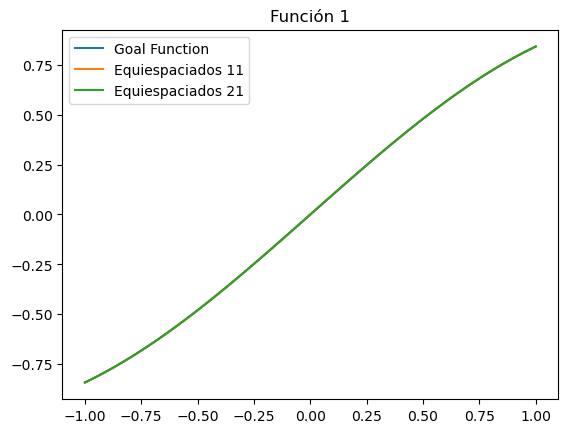

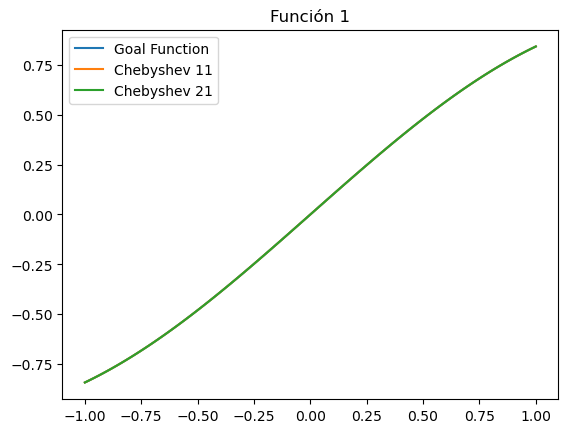

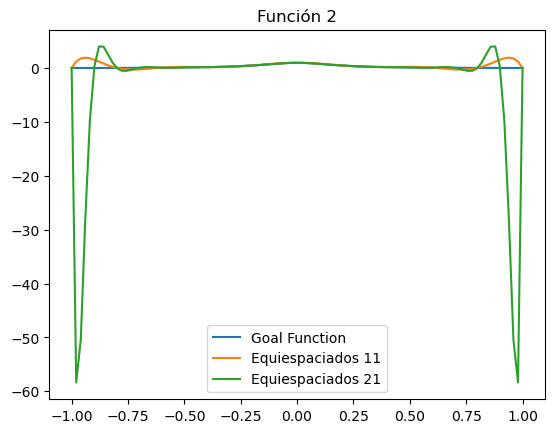

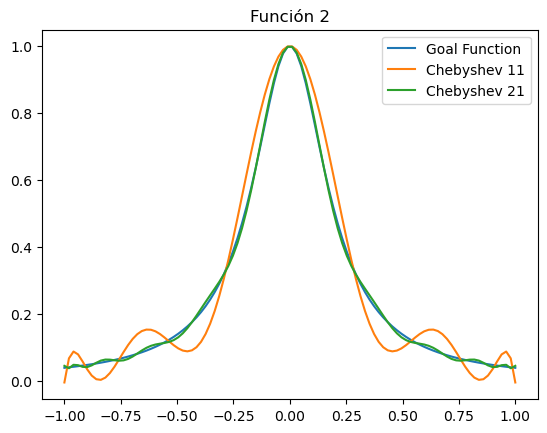

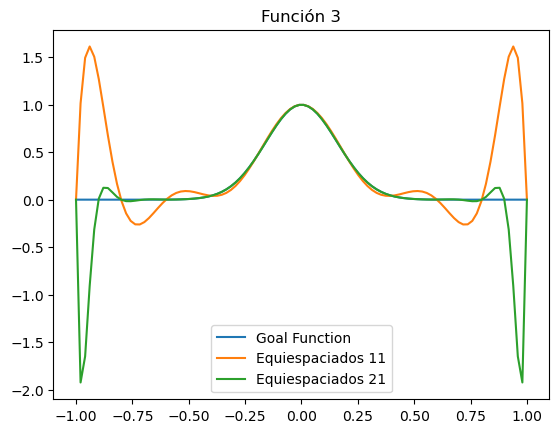

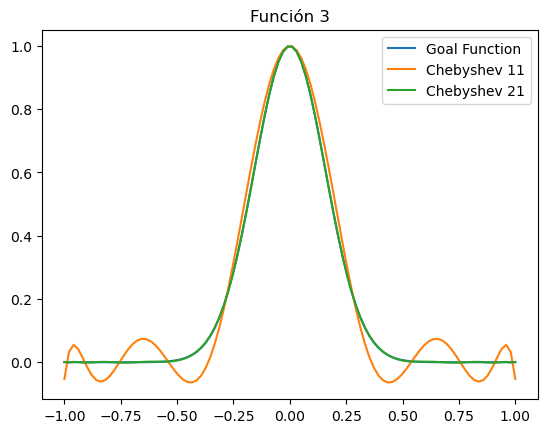

In [6]:
times_bar, error_bar = represent_all(plot_bar)

### Interpolación mediante el polinomio de Lagrange

In [7]:
def lag_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = lagrange(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))/np.sqrt(len(interp_values))
    #error = np.square(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_lag(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = lag_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

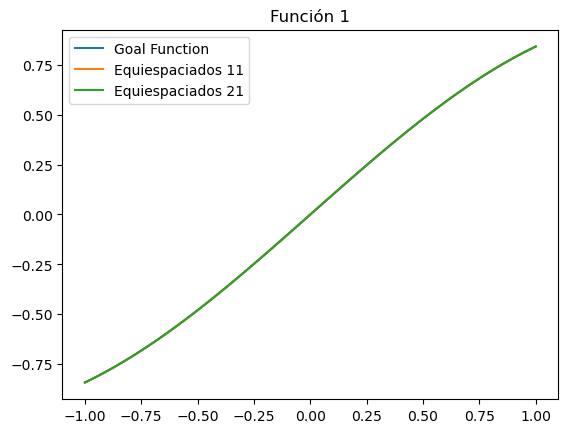

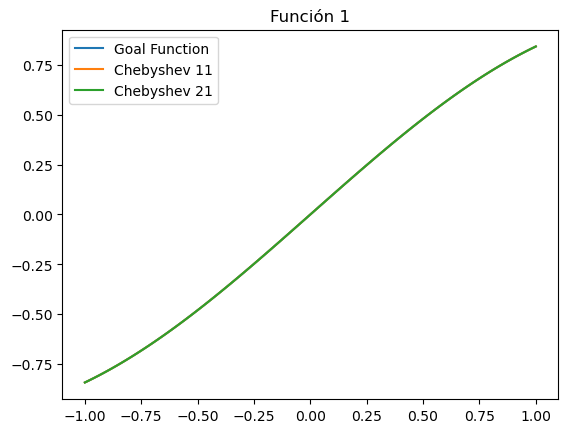

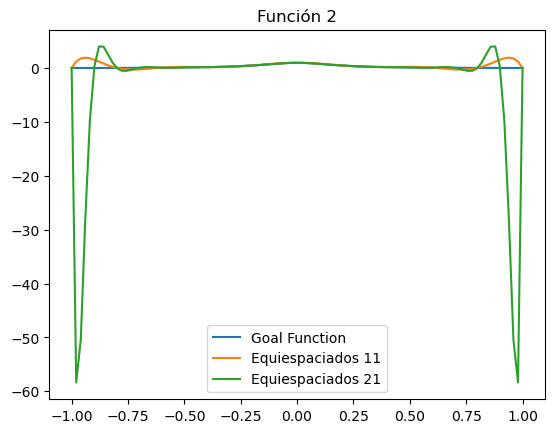

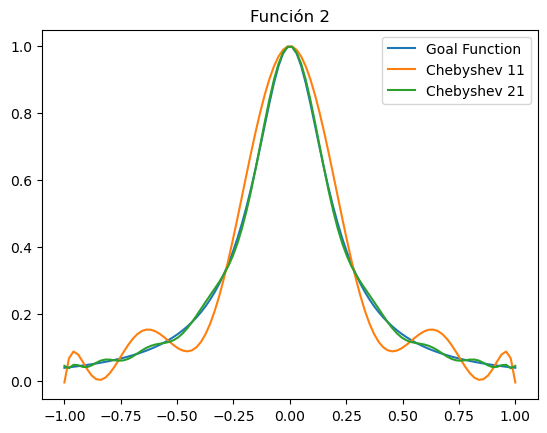

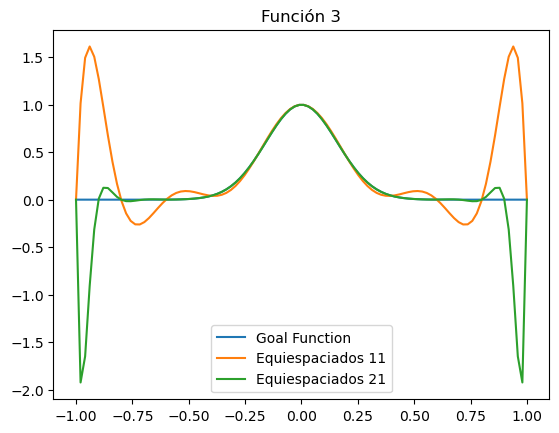

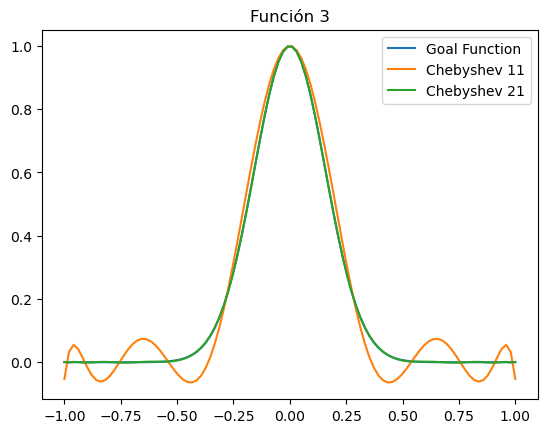

In [8]:
times_lag, error_lag = represent_all(plot_lag)

### Diferencias divididas de Newton

In [9]:
# implementación del método de Newton
def newton_pol(x,f):
    """ 
    type x: list
    params x: lista con los nodos en los que se quiere evaluar
    type f: list
    params f: lista de valores de la función que se quiere interpolar en los nodos x
    """
    z = symbols('z')
    coef = list()
    coef.append(f[0])
    p = list()
    p.append(1)
    # inicializamos para entrar en el bucle
    dif = np.diff(f) / np.diff(x)
    coef.append(dif[0])
    p.append(z - x[0])
    i = 1
    while len(dif) > 1:
        i += 1
        dif = np.diff(dif) / np.array([x[j+i] - x[j] for j in  range(len(x)-i)])        
        coef.append(dif[0])
        p.append(p[-1]* (z - x[i-1]))
    return lambdify(z, np.sum(np.array(coef) * np.array(p)), 'numpy')

In [10]:
def new_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = newton_pol(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))/np.sqrt(len(interp_values))
    #error = np.square(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_new(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = new_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

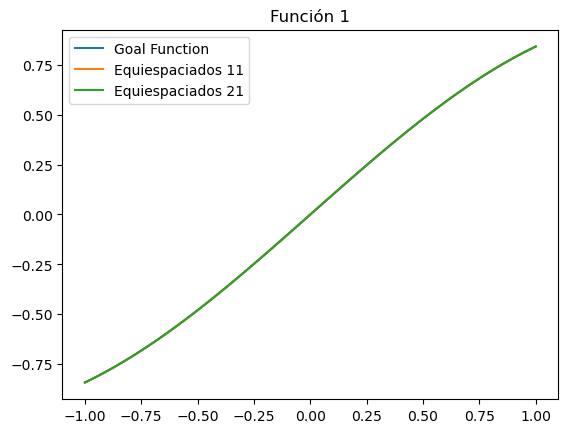

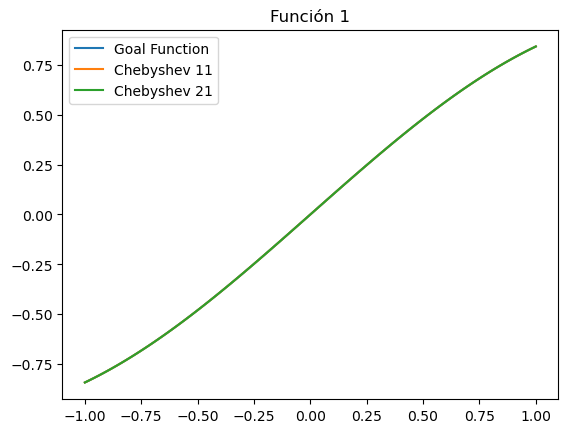

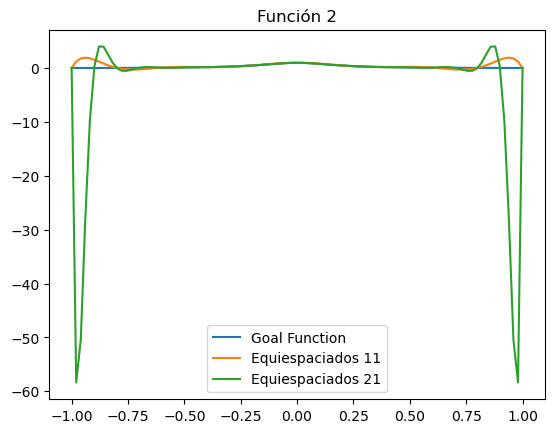

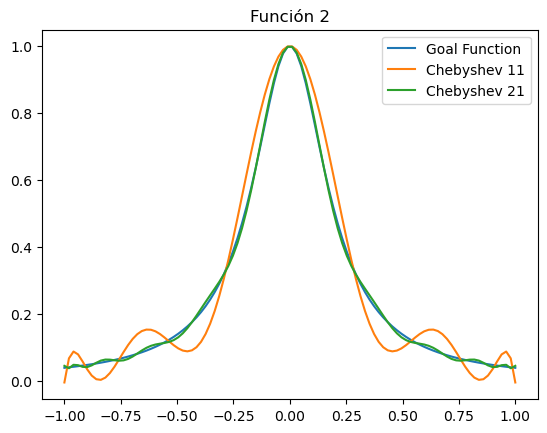

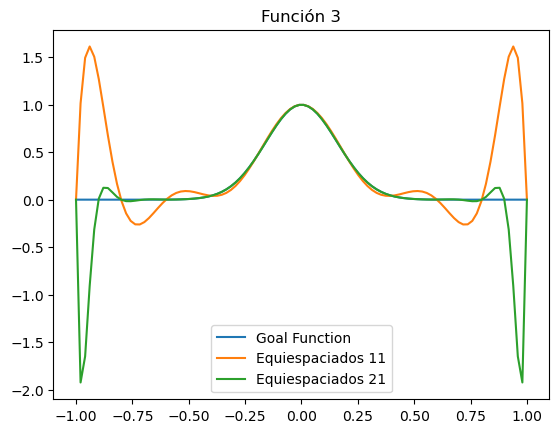

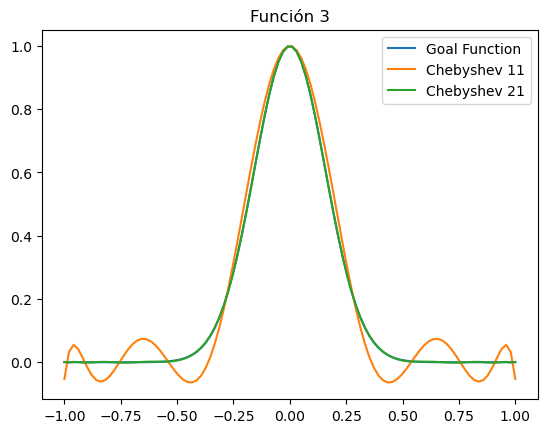

In [11]:
times_new, error_new = represent_all(plot_new)

### SPLINES CÚBICOS

In [12]:
from scipy.interpolate import CubicSpline
def spline_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = CubicSpline(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))/np.sqrt(len(interp_values))
    #error = np.square(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_spline(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = spline_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

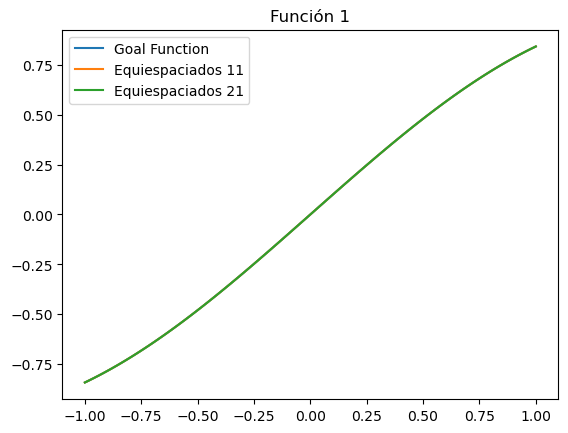

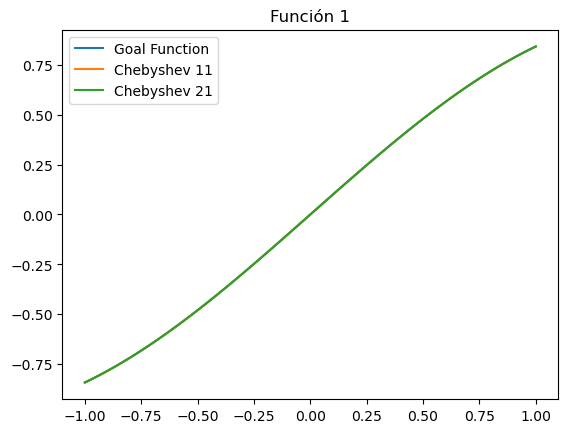

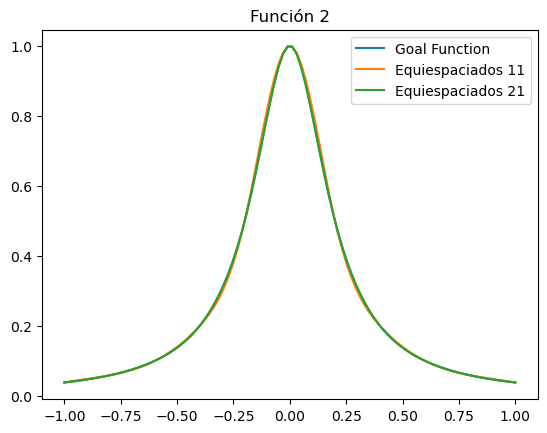

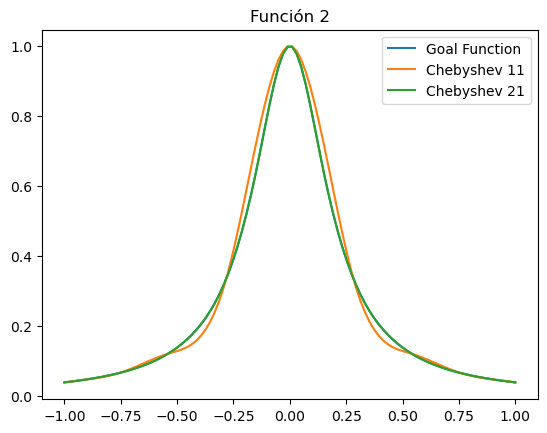

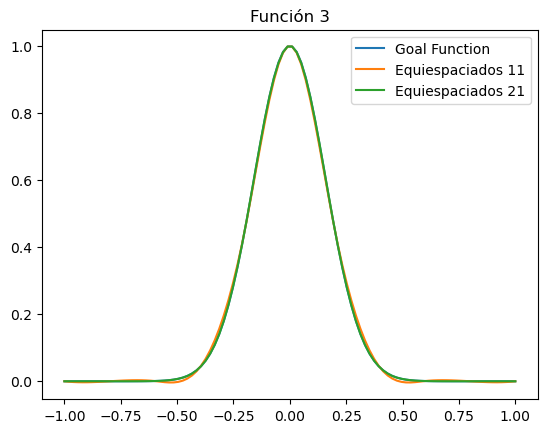

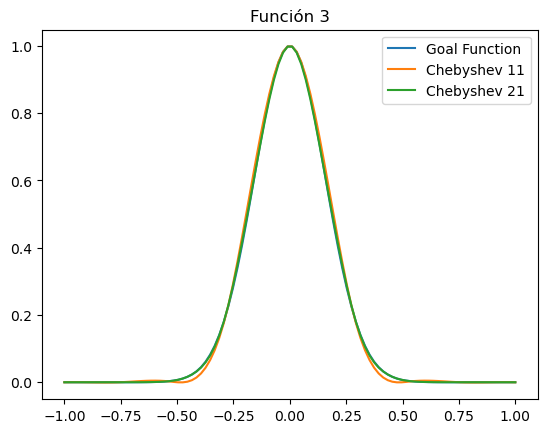

In [13]:
times_spline, error_spline = represent_all(plot_spline)

In [14]:
def bar_plot(title, dict, ylabel):
    series = ('Función 1', 'Función 2', 'Función 3')
    x = np.array([3, 8, 13])# the label locations
    width = 1  # the width of the bars
    multiplier = 0
    
    fig, ax =plt.subplots()

    for attribute, measurement in dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset - 0.5, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, fmt='%.2E', rotation=90)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, series)
    if (title != 'Resultados para 21 nodos equiespaciados distribuidos por método y función' and ylabel == 'Error'):
        ax.set_ylim([0,10])
    ax.legend()
    
    plt.show()

In [15]:
times = np.array([times_bar, times_lag, times_new, times_spline])
errors = np.array([error_bar, error_lag, error_new, error_spline])
titles = ['Resultados para 11 nodos equiespaciados distribuidos por método y función',
          'Resultados para 11 nodos de Chebyshev distribuidos por método y función',
          'Resultados para 21 nodos equiespaciados distribuidos por método y función',
          'Resultados para 21 nodos de Chebyshev distribuidos por método y función']
errors_labeled_eq11 = {'Interpolación Baricéntrica':[errors[0,i,0] for i in [0,2,4]], 'Interpolador de Lagrange':[errors[1, i, 0] for i in [0,2,4]], 
                       'Interpolador de Newton':[errors[2, i, 0] for i in [0,2,4]], 'Splines cúbicos': [errors[3, i, 0] for i in [0,2,4]]}
errors_labeled_eq21 = {'Interpolación Baricéntrica':[errors[0,i,1] for i in [0,2,4]], 'Interpolador de Lagrange':[errors[1, i, 1] for i in [0,2,4]], 
                       'Interpolador de Newton':[errors[2, i, 1] for i in [0,2,4]], 'Splines cúbicos': [errors[3, i, 1] for i in [0,2,4]]}
errors_labeled_ch11 = {'Interpolación Baricéntrica':[errors[0,i,0] for i in [1,3,5]], 'Interpolador de Lagrange':[errors[1, i, 0] for i in [1,3,5]], 
                       'Interpolador de Newton':[errors[2, i, 0] for i in [1,3,5]], 'Splines cúbicos': [errors[3, i, 0] for i in [1,3,5]]}
errors_labeled_ch21 = {'Interpolación Baricéntrica':[errors[0,i,1] for i in [1,3,5]], 'Interpolador de Lagrange':[errors[1, i, 1] for i in [1,3,5]], 
                       'Interpolador de Newton':[errors[2, i, 1] for i in [1,3,5]], 'Splines cúbicos': [errors[3, i, 1] for i in [1,3,5]]}


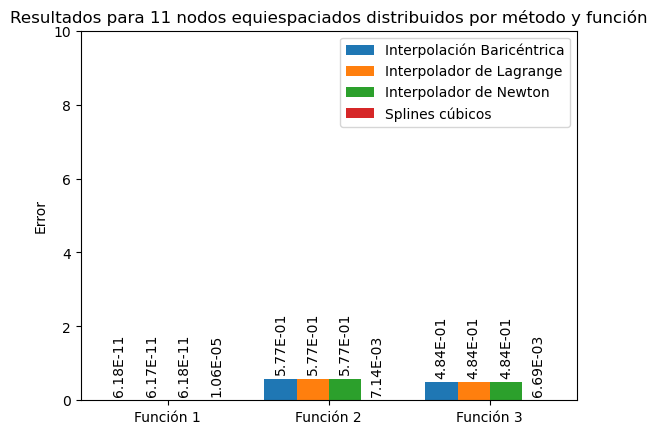

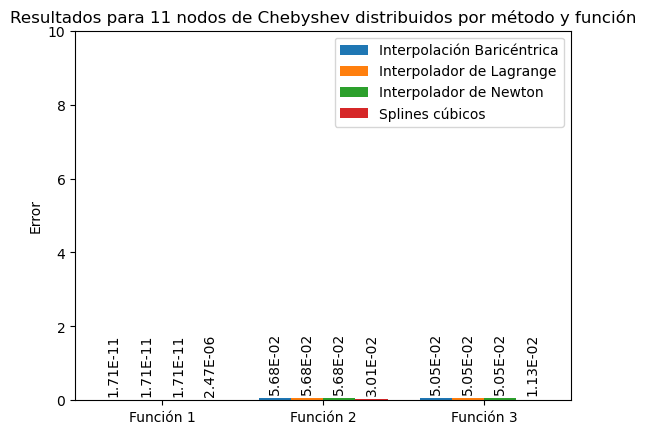

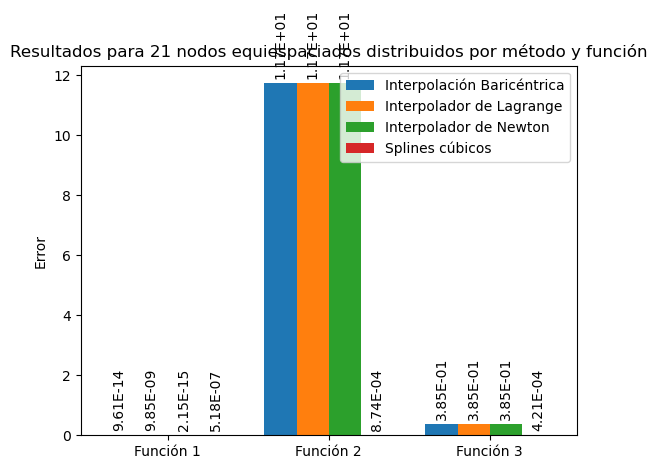

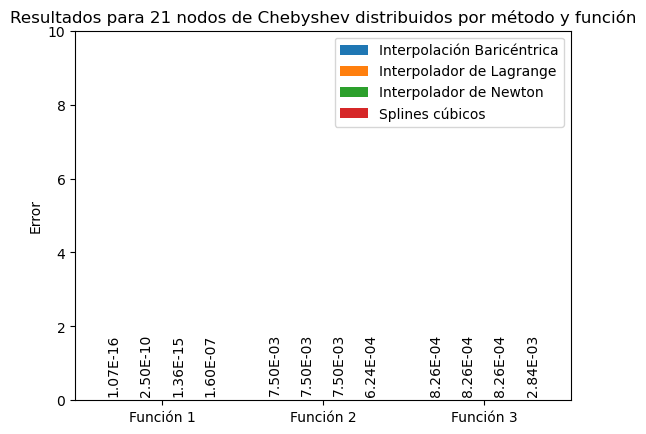

In [16]:
bar_plot(titles[0], errors_labeled_eq11, 'Error')
bar_plot(titles[1], errors_labeled_ch11, 'Error')
bar_plot(titles[2], errors_labeled_eq21, 'Error')
bar_plot(titles[3], errors_labeled_ch21, 'Error')

In [17]:
times_labeled_eq11 = {'Interpolación Baricéntrica':[times[0,i,0] for i in [0,2,4]], 'Interpolador de Lagrange':[times[1, i, 0] for i in [0,2,4]], 
                       'Interpolador de Newton':[times[2, i, 0] for i in [0,2,4]], 'Splines cúbicos': [times[3, i, 0] for i in [0,2,4]]}
times_labeled_eq21 = {'Interpolación Baricéntrica':[times[0,i,1] for i in [0,2,4]], 'Interpolador de Lagrange':[times[1, i, 1] for i in [0,2,4]], 
                       'Interpolador de Newton':[times[2, i, 1] for i in [0,2,4]], 'Splines cúbicos': [times[3, i, 1] for i in [0,2,4]]}
times_labeled_ch11 = {'Interpolación Baricéntrica':[times[0,i,0] for i in [1,3,5]], 'Interpolador de Lagrange':[times[1, i, 0] for i in [1,3,5]], 
                       'Interpolador de Newton':[times[2, i, 0] for i in [1,3,5]], 'Splines cúbicos': [times[3, i, 0] for i in [1,3,5]]}
times_labeled_ch21 = {'Interpolación Baricéntrica':[times[0,i,1] for i in [1,3,5]], 'Interpolador de Lagrange':[times[1, i, 1] for i in [1,3,5]], 
                       'Interpolador de Newton':[times[2, i, 1] for i in [1,3,5]], 'Splines cúbicos': [times[3, i, 1] for i in [1,3,5]]}

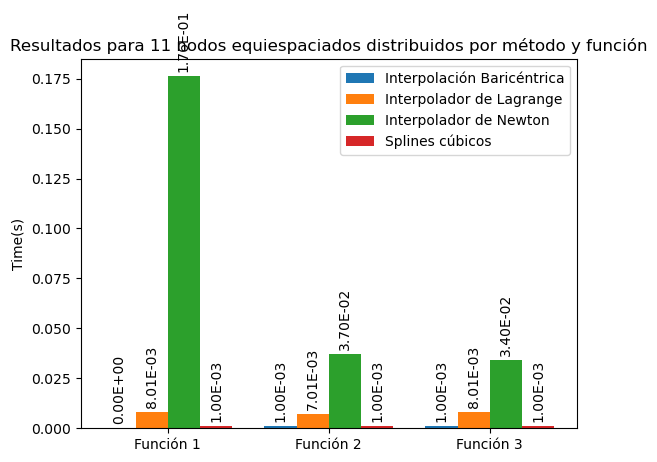

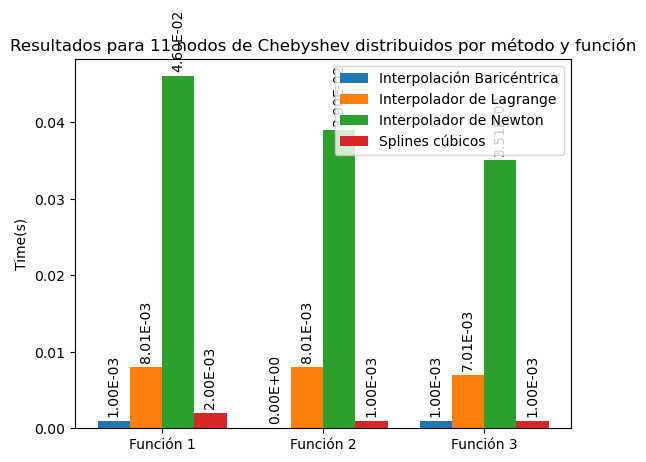

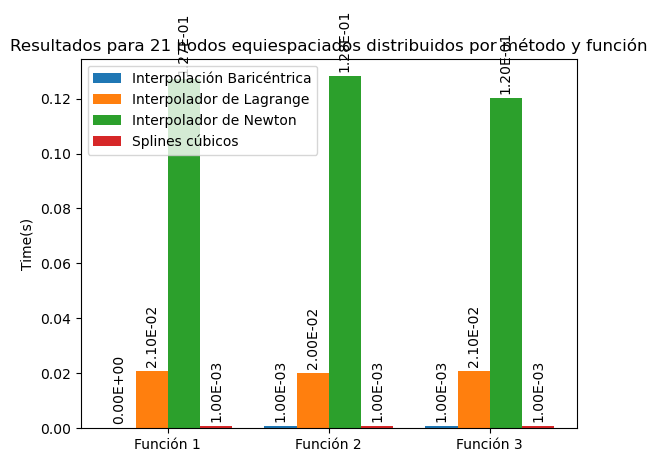

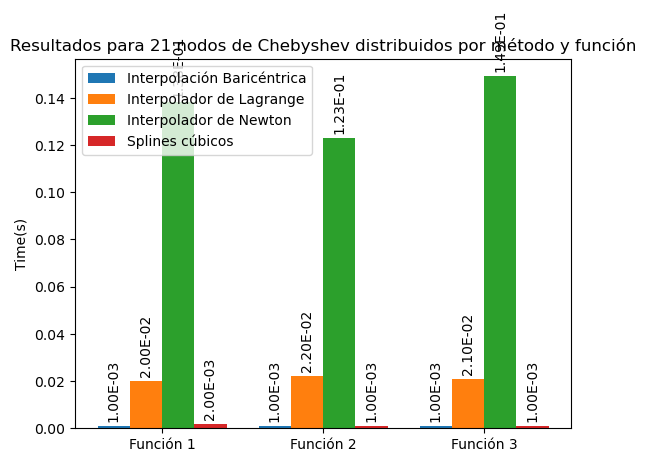

In [18]:
bar_plot(titles[0], times_labeled_eq11, 'Time(s)')
bar_plot(titles[1], times_labeled_ch11, 'Time(s)')
bar_plot(titles[2], times_labeled_eq21, 'Time(s)')
bar_plot(titles[3], times_labeled_ch21, 'Time(s)')

## COMENTARIOS Y CONCLUSIONES

En cuanto a los resultados de interpolación, se ve como en las funciones objetivo 2 y 3 se sucede el fenómeno de Runge, empeorando los resultados de manera drástica al aumentar el número de nodos equiespaciados, y que esto se remedia notablemente al emplear los nodos de Chebyshev.

En el caso de emplear los nodos de Chebysev, los resultados siempre son mejores que con nodos equiespaciados (de manera más significativa en las funciones 2 y 3) y siempre son mejores cuántos más nodos empleemos.

Estamos hablando de ser mejores o peores en el sentido de qué error se ha cometido. Aprovechemos entonces para comentar un poco cómo se ha decidido medir el error. El error se evalúa como la norma 2 de un vector de dimensión 100 en el que cada coordenada es la diferencia entre la función objetivo y el polinomio interpolador en un punto del intervalo $[-1,1]$, siendo estos uniformemente distribuidos a lo largo del mismo. No es únivoca la manera de evaluar el error, y esta ha sido la escogida en este caso, guiados por la sugerencia de emplear técnicas de álgebra lineal para este cálculo. Otras maneras razonables de medir este error podrían haber sido medir las normas en espacios $\mathcal{L}^p$ (integrales del valor absoluto de una función) de la diferencia entre el polinomio interpolador y la función objetivo en el intervalo de interés. En este caso, al discretizarlo se convierte en el error medio cuadratico.

Se puede observar que los resultados obtenidos con los tres primeros métodos son prácticamente idénticos, lo cual tiene sentido, puesto que el polinomio interpolador de grado $n$ construido mediante $n+1$ condiciones (valor en puntos) linealmente independientes es único, y por tanto la solución es la misma en los tres primeros métodos.

En cuanto al coste temporal, como era de esperar, el que peor rinde es el implementado por nosotros. Se ve que el tiempo necesario para construir el interpolador por splines es más o menos constante, aunque en este aspecto parece que el ganador es la implementación de la interpolación baricéntrica (nótese que medimos el tiempo que tardamos en construir el polinomio y evaluarlo en la lista de 100 puntos, y que en todos los casos excepto el baricéntrico, primero se construye un interpolador y luego se evalúa, mientras que en el baricéntrico, el método de scipy no devuelve el interpolador, y solo da la opción de obtener la evaluación del mismo en una serie de puntos, lo cual puede ser aprovechado para una implementación más eficiente.

El claro ganador en cuanto a rendimiento son los Splines cúbicos, puesto que en ellos no se aprecia el fenómeno de Runge y devuelven una mucho mejor aproximación en todos los casos al usar siempre 4 puntos. Además, los Splines son una herramienta muy potente puesto que podemos imponer condiciones sobre el valor y las derivadas de la función, construyendo a trozos un interpolador que se parezca lo más posible localmente a la función objetivo.